## Changing Frequency

In [12]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import yfinance as yf

1- Obtain the simple returns in case of starting in this recipe

In [3]:
# Download data
df = yf.download('AAPL', start='2013-01-01', end='2023-12-31', auto_adjust=False, progress=False)

In [4]:
# Keep only the adjusted close price
df = df.loc[:, ['Adj Close']]
df.rename(columns={'Adj Close':'adj_close'}, inplace=True)

In [5]:
# Calculate simple returns
df['log_rtn'] = np.log(df.adj_close/df.adj_close.shift(1))

In [6]:
# Remove redundant data
df.drop('adj_close', axis=1, inplace=True)
df.dropna(axis=0, inplace=True)

In [7]:
# show data
df.head()

,log_rtn
Date,
2013-01-03,-0.012703
2013-01-04,-0.028250
2013-01-07,-0.005900
2013-01-08,0.002688
2013-01-09,-0.015752


2- Define the function for calculating the realized volatility

In [8]:
"""
    REALIZED VOLATILITY is annualized by multiplying
    daily realized variance with a number of trading
    days/weeks/months in a year. The square root of the
    annualized realized variance is the realized volatility
"""
def realized_volatility(x):
    return np.sqrt(np.sum(x**2))

3- Calculate monthly realized volatility

In [10]:
df_rv = df.groupby(pd.Grouper(freq='M')).apply(realized_volatility)
df_rv.rename(columns={'log_rtn':'rv'}, inplace=True)

4- Annualize the values

In [11]:
df_rv.rv = df_rv.rv * np.sqrt(12)

5- Plot results

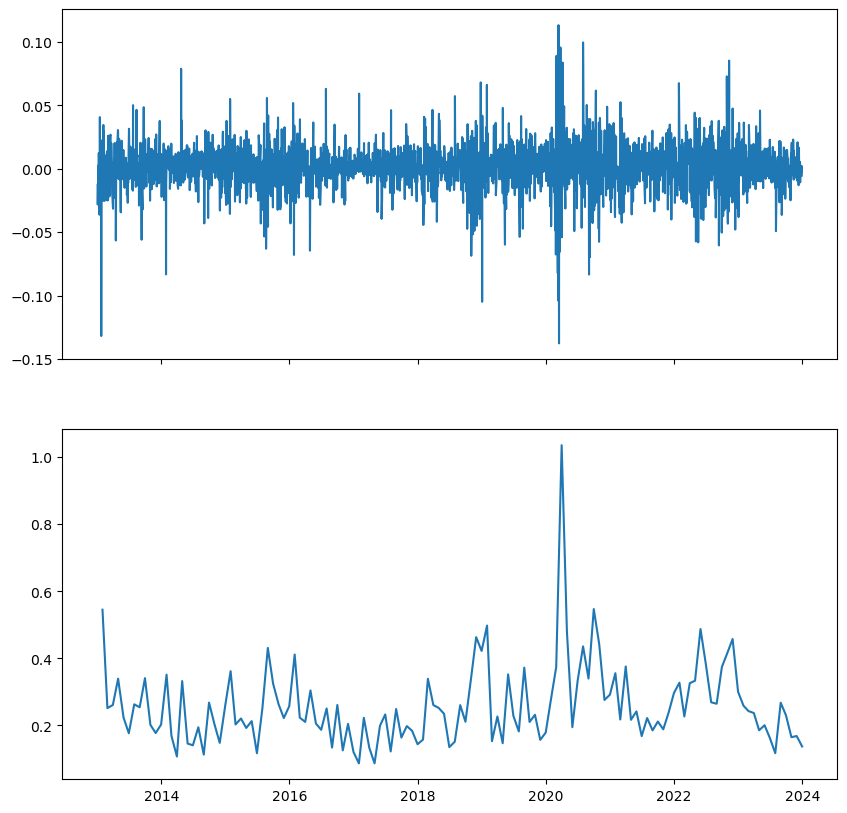

In [15]:
fig, ax = plt.subplots(2, 1, sharex=True, figsize=(10,10))
ax[0].plot(df)
ax[1].plot(df_rv)

# plt.tight_layout()
plt.show()